In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import json

In [7]:
df = pd.read_json('dataset/data_captioned.json',orient='records')
df

,tag_string_general,has_visible_children,has_large,tag_count_meta,bit_flags,has_active_children,preview_file_url,image_width,updated_at,tag_string_artist,...,file_ext,last_commented_at,last_comment_bumped_at,parent_id,approver_id,pixiv_id,last_noted_at,prompt_string,prompt_format_id,caption_string
0,1girl areola_slip areolae arm_under_breasts ba...,False,0.0,1,2,False,https://cdn.donmai.us/preview/cd/99/cd9918b473...,778,2021-12-11 19:37:27.451000+00:00,inoue_takuya_(tactactak),...,jpg,NaT,NaT,NaN,131474.0,75772220.0,NaT,Reply with an eloquent caption based on all th...,0,"""Through the skilled hands of artist inoue_tak..."
1,2girls blue_eyes blue_hair hat multiple_girls ...,False,0.0,1,0,False,https://cdn.donmai.us/preview/0d/c1/0dc1e76d97...,600,2021-07-15 18:21:13.327000+00:00,yuzuki_(yuduame),...,jpg,NaT,NaT,NaN,NaN,2658681.0,NaT,Reply with a concise description of an artwork...,1,"The artwork features two girls, Cirno and Lett..."
2,2girls blurry bug butterfly cherry_blossoms de...,False,0.0,2,0,False,https://cdn.donmai.us/preview/07/bd/07bdb85252...,700,2021-08-30 09:34:50.982000+00:00,tokoroten_(hmmuk),...,jpg,NaT,NaT,NaN,318380.0,39438207.0,NaT,Reply with a concise description of an artwork...,1,"The artwork features two girls, Konpaku Youmu ..."
3,1girl animal_ears bell brown_eyes brown_hair f...,False,1.0,2,0,False,https://cdn.donmai.us/preview/8b/da/8bda6612f4...,1000,2021-07-01 20:44:18.278000+00:00,neme,...,jpg,NaT,NaT,NaN,13392.0,37532574.0,NaT,Reply with a highly condensed run on sentence ...,2,Neme's artist rendition of Touhou's Futatsuiwa...
4,1girl bangs black_headwear blue_eyes blue_hair...,False,1.0,1,2,False,https://cdn.donmai.us/preview/72/bf/72bfaeb56a...,1448,2021-11-17 01:45:03.298000+00:00,osechi_(pixiv56606477),...,jpg,NaT,NaT,NaN,NaN,92667932.0,NaT,Reply with a concise description of an artwork...,1,The artwork is a portrait of Hoshimachi Suisei...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,6+girls ahoge aqua_hair bandages black_hair bl...,True,1.0,5,2,True,https://cdn.donmai.us/preview/58/f9/58f9e9c255...,13780,2021-12-07 21:47:28.679000+00:00,05tom16,...,png,NaT,NaT,NaN,69681.0,71996871.0,NaT,Reply with a concise description of an artwork...,1,The artwork by 05tom16 features six girls from...
19946,1girl arms_up backlighting bangs black_hair bl...,False,1.0,4,0,False,https://cdn.donmai.us/preview/f7/3b/f73b27d5c4...,1400,2021-12-25 06:01:54.964000+00:00,seia_aramaki,...,jpg,NaT,NaT,NaN,NaN,NaN,NaT,Reply with a concise description of an artwork...,1,The artwork features the character Shiragiku H...
19947,1girl breasts cleavage greyscale headphones la...,False,0.0,1,0,False,https://cdn.donmai.us/preview/1d/20/1d20537a4c...,800,2021-09-04 03:39:32.158000+00:00,onsoku_inu,...,png,NaT,NaT,NaN,23580.0,55190979.0,NaT,Reply with an eloquent caption based on all th...,0,"With her sultry gaze and captivating curves, S..."
19948,1girl :d ahoge alternate_costume animal_ears b...,False,1.0,5,2,False,https://cdn.donmai.us/preview/44/33/44332e6525...,1039,2021-10-24 09:52:06.640000+00:00,masayo_(gin_no_ame),...,jpg,NaT,NaT,3851288.0,NaN,78921160.0,NaT,Reply with a highly condensed run on sentence ...,2,Masayo (Gin no Ame) depicts Kuma (Kantai Colle...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19950 entries, 0 to 19949
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tag_string_general      19950 non-null  object             
 1   has_visible_children    19950 non-null  bool               
 2   has_large               19892 non-null  float64            
 3   tag_count_meta          19950 non-null  int32              
 4   bit_flags               19950 non-null  int32              
 5   has_active_children     19950 non-null  bool               
 6   preview_file_url        19636 non-null  object             
 7   image_width             19950 non-null  int32              
 8   updated_at              19950 non-null  datetime64[ns, UTC]
 9   tag_string_artist       19950 non-null  object             
 10  tag_count               19950 non-null  int32              
 11  is_status_locked        19950 non-null  b

In [10]:
int_cols = ['tag_count_meta',
            'bit_flags',
            'image_width',
            'tag_count',
            'file_size',
            'tag_count_character',
            'tag_count_artist',
            'tag_count_general',
            'fav_count',
            'tag_count_copyright',
            'down_score',
            'score',
            'image_height',
            'up_score',
            ]
df[int_cols] = df[int_cols].astype('int')

In [21]:
train_data_df = df[['caption_string','tag_string']]
train_data_df['tag_string'] = train_data_df['tag_string'].str.replace(' ', ', ')
train_data_df
result = train_data_df.to_json(orient='records')
parsed = json.loads(result)
with open('train_data.json', 'w') as outfile:
    json.dump(parsed, outfile, indent=4)

C:\Users\panta\AppData\Local\Temp\ipykernel_12464\1183658474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_df['tag_string'] = train_data_df['tag_string'].str.replace(' ', ', ')


In [5]:
df = df.drop(columns=[
    'has_visible_children',
    'has_large',
    'bit_flags',
    'has_active_children',
    'image_width',
    'is_status_locked',
    'is_pending',
    'file_size',
    'large_file_url',
    'fav_count',
    'has_children',
    'tag_count_copyright',
    'is_deleted',
    'md5',
    'down_score',
    'image_height',
    'is_flagged',
    'is_note_locked',
    'is_rating_locked',
    'file_url',
    'is_banned',
    'uploader_id',
    'up_score',
    'approver_id',
    'pixiv_id',
    'last_noted_at',
    'last_commented_at',
    'last_comment_bumped_at',
    'parent_id',
    'source'
])
df

,tag_string_general,tag_count_meta,preview_file_url,updated_at,tag_string_artist,tag_count,tag_count_character,tag_count_artist,tag_count_general,score,...,tag_string_meta,created_at,rating,tag_string_copyright,id,tag_string_character,file_ext,prompt_string,prompt_format_id,caption_string
0,1girl areola_slip areolae arm_under_breasts ba...,1,https://cdn.donmai.us/preview/cd/99/cd9918b473...,2021-12-11 19:37:27.451000+00:00,inoue_takuya_(tactactak),35,1,1,30,45,...,commentary_request,2019-07-17 10:21:28.155000+00:00,q,xenoblade_chronicles_(series) xenoblade_chroni...,3569219.0,pyra_(xenoblade),jpg,Reply with an eloquent caption based on all th...,0,"""Through the skilled hands of artist inoue_tak..."
1,2girls blue_eyes blue_hair hat multiple_girls ...,1,https://cdn.donmai.us/preview/0d/c1/0dc1e76d97...,2021-07-15 18:21:13.327000+00:00,yuzuki_(yuduame),15,2,1,10,3,...,commentary_request,2009-01-07 10:02:35.221000+00:00,s,touhou,383915.0,cirno letty_whiterock,jpg,Reply with a concise description of an artwork...,1,"The artwork features two girls, Cirno and Lett..."
2,2girls blurry bug butterfly cherry_blossoms de...,2,https://cdn.donmai.us/preview/07/bd/07bdb85252...,2021-08-30 09:34:50.982000+00:00,tokoroten_(hmmuk),22,3,1,14,2,...,bad_id bad_pixiv_id,2014-01-02 11:50:18.424000+00:00,s,ghostly_field_club touhou,1584028.0,konpaku_youmu saigyou_ayakashi usami_renko,jpg,Reply with a concise description of an artwork...,1,"The artwork features two girls, Konpaku Youmu ..."
3,1girl animal_ears bell brown_eyes brown_hair f...,2,https://cdn.donmai.us/preview/8b/da/8bda6612f4...,2021-07-01 20:44:18.278000+00:00,neme,19,1,1,14,5,...,bad_id bad_pixiv_id,2013-08-04 17:04:40.033000+00:00,s,touhou,1478420.0,futatsuiwa_mamizou,jpg,Reply with a highly condensed run on sentence ...,2,Neme's artist rendition of Touhou's Futatsuiwa...
4,1girl bangs black_headwear blue_eyes blue_hair...,1,https://cdn.donmai.us/preview/72/bf/72bfaeb56a...,2021-11-17 01:45:03.298000+00:00,osechi_(pixiv56606477),23,1,1,19,20,...,highres,2021-11-16 20:30:00.417000+00:00,s,hololive,4919312.0,hoshimachi_suisei,jpg,Reply with a concise description of an artwork...,1,The artwork is a portrait of Hoshimachi Suisei...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,6+girls ahoge aqua_hair bandages black_hair bl...,5,https://cdn.donmai.us/preview/58/f9/58f9e9c255...,2021-12-07 21:47:28.679000+00:00,05tom16,63,7,1,49,2,...,absurdres commentary_request highres incredibl...,2018-12-06 23:13:41.756000+00:00,s,zombie_land_saga,3339882.0,hoshikawa_lily konno_junko minamoto_sakura miz...,png,Reply with a concise description of an artwork...,1,The artwork by 05tom16 features six girls from...
19946,1girl arms_up backlighting bangs black_hair bl...,4,https://cdn.donmai.us/preview/f7/3b/f73b27d5c4...,2021-12-25 06:01:54.964000+00:00,seia_aramaki,38,1,1,30,8,...,bad_id bad_twitter_id commentary highres,2021-12-25 06:01:54.964000+00:00,s,idolmaster idolmaster_cinderella_girls,5003302.0,shiragiku_hotaru,jpg,Reply with a concise description of an artwork...,1,The artwork features the character Shiragiku H...
19947,1girl breasts cleavage greyscale headphones la...,1,https://cdn.donmai.us/preview/1d/20/1d20537a4c...,2021-09-04 03:39:32.158000+00:00,onsoku_inu,20,1,1,16,2,...,commentary_request,2016-02-11 20:56:12.266000+00:00,s,nitroplus,2271962.0,super_sonico,png,Reply with an eloquent caption based on all th...,0,"With her sultry gaze and captivating curves, S..."
19948,1girl :d ahoge alternate_costume animal_ears b...,5,https://cdn.donmai.us/preview/44/33/44332e6525...,2021-10-24 09:52:06.640000+00:00,masayo_(gin_no_ame),33,1,1,25,14,...,bad_id bad_pixiv_id commentary_request highres...,2020-01-15 15:00:51.859000+00:00,s,kantai_collection,3749207.0,kuma_(kancolle),jpg,Reply with a highly condensed run on sentence ...,2,Masayo (Gin no Ame) depicts Kuma (Kantai Colle...


In [27]:
df.caption_string.str.split().apply(len)

0         89
1         51
2         66
3         36
4         73
        ... 
19945     94
19946    103
19947     92
19948     63
19949     64
Name: caption_string, Length: 19950, dtype: int64

[Text(0.5, 1.0, 'caption_string length distribution')]

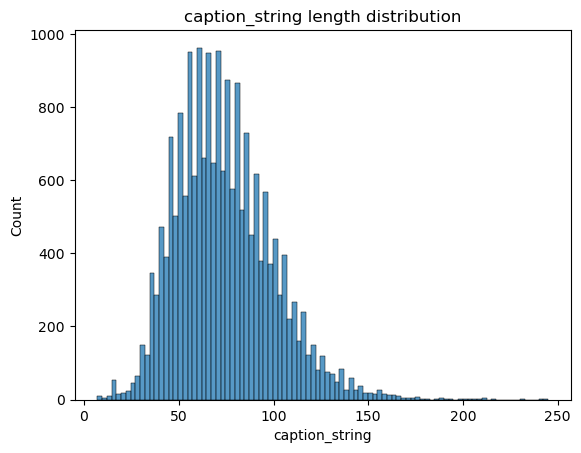

In [28]:
sns.histplot(data=df.caption_string.str.split().apply(len)).set(title='caption_string length distribution')

In [83]:
from collections import defaultdict
import pandas as pd


def count_tags(df):
    tag_counts = defaultdict(lambda: {'post_count': 0, 'category': ''})
    category_map = {'tag_string_general': 'general', 
                    'tag_string_copyright': 'copyright', 
                    'tag_string_character': 'character', 
                    'tag_string_meta': 'meta', 
                    'tag_string_artist': 'artist'}
    for _, row in df.iterrows():
        for col in category_map:
            tags = row[col].split()
            for tag in tags:
                tag_counts[tag]['post_count'] += 1
                tag_counts[tag]['category'] = category_map[col]
    return tag_counts


def create_df(tag_counts):
    tag_df = pd.DataFrame.from_dict(tag_counts, orient='index')
    tag_df.index.name = 'name'
    tag_df = tag_df.sort_values('post_count', ascending=False)
    tag_df = tag_df.reset_index()
    return tag_df

In [84]:
tag_counts = count_tags(df)
tag_df = create_df(tag_counts)
tag_df

,name,post_count,category
0,1girl,14090,general
1,commentary_request,11825,meta
2,solo,11646,general
3,long_hair,10299,general
4,highres,10249,meta
...,...,...,...
39783,meipu_hm,1,artist
39784,mia_(fire_emblem),1,character
39785,mitani_yuuki,1,character
39786,teramoto_tomiko,1,character


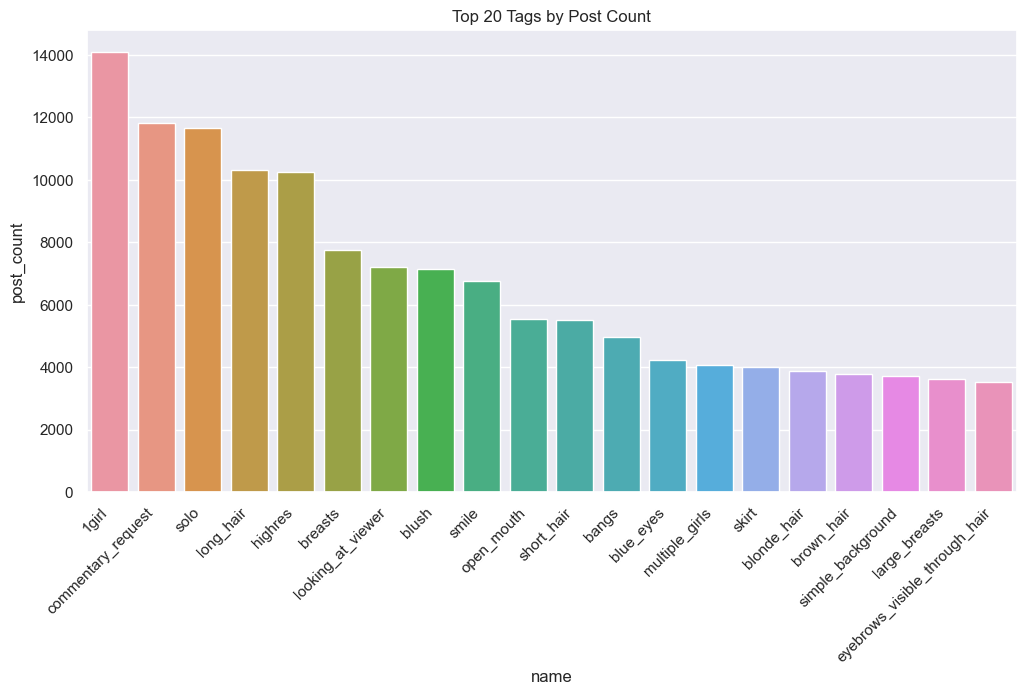

In [109]:
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='post_count', data=tag_df.head(20)).set(title='Top 20 Tags by Post Count')
plt.xticks(rotation=45, ha='right')
plt.show()

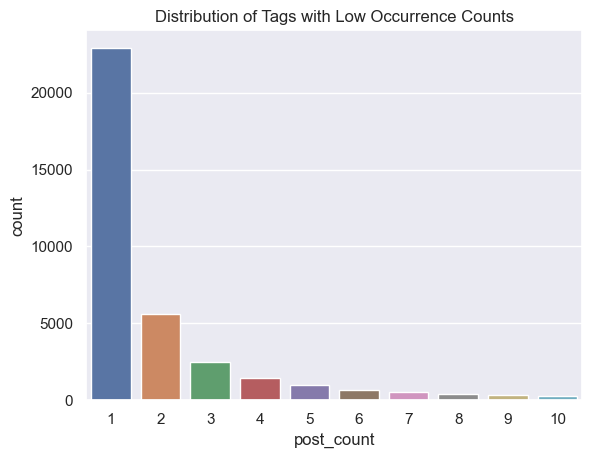

In [126]:
sns.countplot(data=tag_df[tag_df['post_count'] <= 10], x='post_count')\
   .set(title='Distribution of Tags with Low Occurrence Counts')
plt.show()

In [127]:
tag_df[tag_df["post_count"]==1].sample(10)[['name','category']]

,name,category
37803,german_suplex,general
27626,eroneko-san,character
33131,ushas,artist
30368,portal_(series),copyright
34069,hades_(game),copyright
24179,niwatari_kutaka,character
25952,spiked_footwear,general
39425,red_hare_(fate),character
35489,kurage_(11649021),artist
37389,nobi_nobita,character


In [125]:
tag_df[tag_df["post_count"]==1]['category'].value_counts()

artist       10356
character     6689
general       4337
copyright     1507
meta            38
Name: category, dtype: int64

In [115]:
tag_df = pd.read_json('tags.json', orient='records')
tag_df

FileNotFoundError: File tags.json does not exist

In [4]:
tag_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953659 entries, 0 to 953658
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype              
---  ------      --------------   -----              
 0   updated_at  953659 non-null  datetime64[ns, UTC]
 1   is_locked   953659 non-null  bool               
 2   name        953659 non-null  object             
 3   category    953659 non-null  int64              
 4   created_at  953659 non-null  datetime64[ns, UTC]
 5   post_count  953659 non-null  int64              
 6   id          953659 non-null  int64              
dtypes: bool(1), datetime64[ns, UTC](2), int64(3), object(1)
memory usage: 44.6+ MB


Tag Categories
- 0: general
- 1: artist
- 3: copyright
- 4: characters
- 5: metadata

In [128]:
full_tag_df = pd.read_json(r'danbooru2021/tags.json',orient='records')
full_tag_df

,updated_at,is_locked,name,category,created_at,post_count,id
0,2019-09-02 11:28:03.321000+00:00,False,midori,0,2013-02-28 17:07:15.609000+00:00,0,9
1,2019-09-01 22:29:49.259000+00:00,False,yukari,0,2013-02-28 19:21:47.082000+00:00,0,31
2,2020-08-14 12:06:59.236000+00:00,False,os,0,2013-02-28 21:18:48.041000+00:00,0,36
3,2019-09-02 16:09:04.735000+00:00,False,manga,0,2013-02-28 01:39:36.557000+00:00,0,45
4,2019-09-02 04:14:49.391000+00:00,False,sakuya,0,2013-02-28 20:09:51.819000+00:00,0,71
...,...,...,...,...,...,...,...
953654,2019-09-01 17:57:36.517000+00:00,False,commissioner_upload,5,2018-10-15 23:51:41.711000+00:00,1788,1496610
953655,2019-08-31 02:27:39.116000+00:00,False,colorized,5,2017-12-24 19:43:16.781000+00:00,7932,514234
953656,2019-08-28 11:37:40.821000+00:00,False,game_cg,5,2013-02-28 17:02:51.989000+00:00,43772,8066
953657,2019-09-02 13:50:13.715000+00:00,False,reward_available,5,2017-12-25 11:50:42.823000+00:00,6398,1452451


In [130]:
lookup = {
    0:'general',
    1:'artist',
    3:'copyright',
    4:'characters',
    5:'meta'
}
full_tag_df['category'] = full_tag_df['category'].map(lookup)

0         general
1         general
2         general
3         general
4         general
           ...   
953654       meta
953655       meta
953656       meta
953657       meta
953658       meta
Name: category, Length: 953659, dtype: object

In [7]:
tag_df[tag_df['post_count'] == 0]

,updated_at,is_locked,name,category,created_at,post_count,id
0,2019-09-02 11:28:03.321000+00:00,False,midori,0,2013-02-28 17:07:15.609000+00:00,0,9
1,2019-09-01 22:29:49.259000+00:00,False,yukari,0,2013-02-28 19:21:47.082000+00:00,0,31
2,2020-08-14 12:06:59.236000+00:00,False,os,0,2013-02-28 21:18:48.041000+00:00,0,36
3,2019-09-02 16:09:04.735000+00:00,False,manga,0,2013-02-28 01:39:36.557000+00:00,0,45
4,2019-09-02 04:14:49.391000+00:00,False,sakuya,0,2013-02-28 20:09:51.819000+00:00,0,71
...,...,...,...,...,...,...,...
953262,2021-09-15 20:24:35.756000+00:00,False,animated_doujin,5,2021-09-15 20:24:35.756000+00:00,0,1693258
953263,2021-10-03 04:59:07.811000+00:00,False,check_bird,5,2021-10-03 04:59:07.811000+00:00,0,1699377
953264,2021-10-23 18:55:39.754000+00:00,False,foundation_sample,5,2021-10-23 18:55:39.754000+00:00,0,1706290
953265,2021-10-28 18:31:06.641000+00:00,False,60_fps,5,2021-10-28 18:31:06.641000+00:00,0,1708986


In [9]:
tag_df = tag_df[tag_df['post_count'] > 0]
tag_df

,updated_at,is_locked,name,category,created_at,post_count,id
365617,2020-12-06 11:32:18.049000+00:00,False,noise,0,2013-02-28 15:09:15.911000+00:00,256,7831
365618,2019-09-02 11:04:59.227000+00:00,False,ouendan,0,2013-02-28 21:44:54.495000+00:00,256,408297
365619,2019-08-31 11:19:43.876000+00:00,False,pincushion,0,2013-02-27 01:02:21.606000+00:00,256,487560
365620,2019-09-01 09:19:14.747000+00:00,False,bucket_of_water,0,2013-02-27 03:41:23.737000+00:00,256,547355
365621,2019-09-02 02:41:56.811000+00:00,False,striped_pillow,0,2018-01-02 14:19:47.916000+00:00,256,644465
...,...,...,...,...,...,...,...
953654,2019-09-01 17:57:36.517000+00:00,False,commissioner_upload,5,2018-10-15 23:51:41.711000+00:00,1788,1496610
953655,2019-08-31 02:27:39.116000+00:00,False,colorized,5,2017-12-24 19:43:16.781000+00:00,7932,514234
953656,2019-08-28 11:37:40.821000+00:00,False,game_cg,5,2013-02-28 17:02:51.989000+00:00,43772,8066
953657,2019-09-02 13:50:13.715000+00:00,False,reward_available,5,2017-12-25 11:50:42.823000+00:00,6398,1452451


In [19]:
tag_df.sort_values('post_count',ascending=False).iloc[-10:]

,updated_at,is_locked,name,category,created_at,post_count,id
826130,2019-08-31 06:52:50.557000+00:00,False,carolina_parakeet_(kemono_friends)_(nanaofox1069),4,2019-08-25 16:23:50.256000+00:00,1,1535257
826131,2019-08-31 06:52:50.554000+00:00,False,rivet_(calabi_yau),4,2019-08-25 18:25:04.832000+00:00,1,1535269
826132,2019-08-31 06:53:10.706000+00:00,False,deena_(puyopuyo),4,2019-08-26 13:17:45.972000+00:00,1,1535342
826133,2019-08-31 06:53:10.706000+00:00,False,yana_(puyopuyo),4,2019-08-26 13:17:45.986000+00:00,1,1535343
826134,2019-08-31 06:53:10.705000+00:00,False,naoe_kanetsugu_(nobunaga_no_yabou),4,2019-08-26 14:13:45.632000+00:00,1,1535349
826135,2019-09-01 04:07:25.564000+00:00,False,hirano_fumi,4,2019-08-26 14:40:06.314000+00:00,1,1535355
826136,2019-09-01 04:31:19.311000+00:00,False,vampire_girl_(dungeon_maker),4,2019-08-26 16:51:51.408000+00:00,1,1535379
826137,2019-09-02 08:48:56.653000+00:00,False,defias_pillager,4,2019-08-26 22:01:23.573000+00:00,1,1535392
826138,2019-09-02 04:17:59.930000+00:00,False,nemesis_(overhit),4,2019-08-27 10:22:10.423000+00:00,1,1535451
547353,2021-09-07 15:57:53.145000+00:00,False,narulinn,1,2021-09-07 15:57:53.145000+00:00,1,1691046


<Axes: xlabel='post_count', ylabel='Count'>

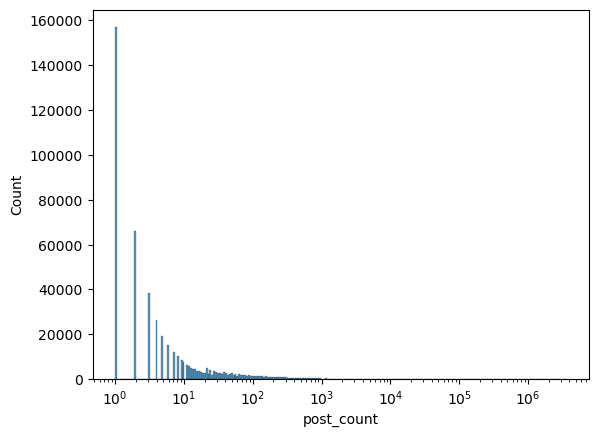

In [43]:
sns.histplot(data=tag_df,x='post_count',log_scale=True)

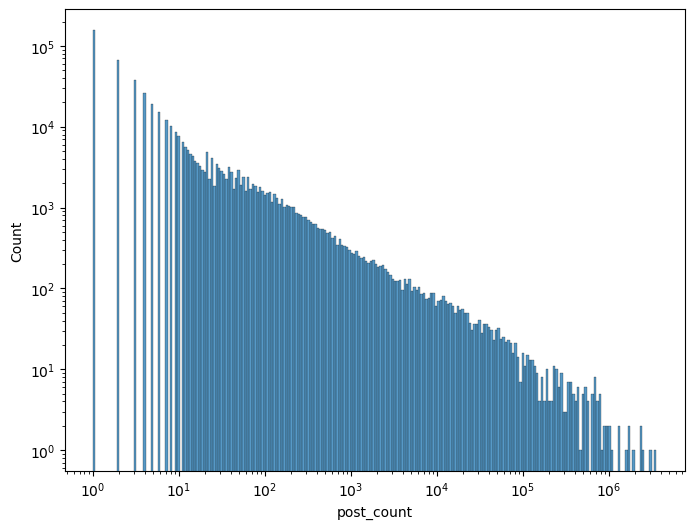

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(data=tag_df,x='post_count',log_scale=True)
ax.set_yscale('log')

<Axes: xlabel='post_count', ylabel='Count'>

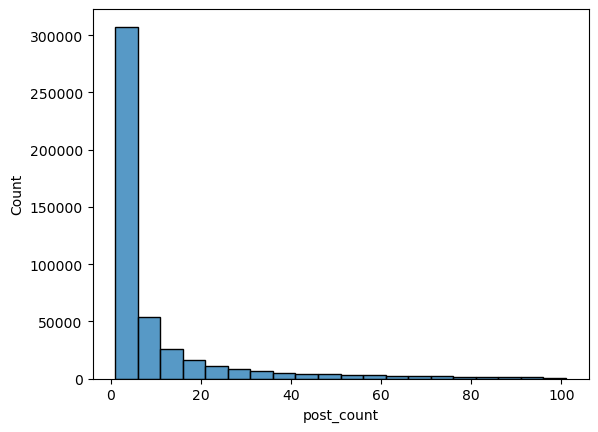

In [46]:
sns.histplot(data=tag_df[tag_df['post_count']<100],x='post_count',binwidth=5)

<Axes: xlabel='post_count', ylabel='Count'>

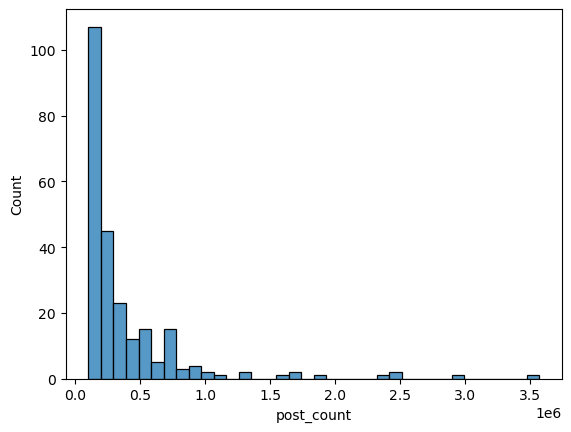

In [40]:
sns.histplot(data=tag_df[tag_df['post_count']>100000],x='post_count')